# Assignment 1 Deepankar Varma 102003431 

In [1]:
%pip install mtcnn
%pip install tensorflow
%pip show mtcnn

# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\acer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\acer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: c:\users\acer\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages
Requires: keras, opencv-python
Required-by: 
Note: you may need to restart the kernel to use updated packages.
0.1.0


In [2]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
# load image from file
filename = 'test1.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
	print(face)

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()

1/1 [==============================] - 1s 523ms/step
{'box': [373, 85, 97, 127], 'confidence': 0.9999923706054688, 'keypoints': {'left_eye': (391, 133), 'right_eye': (437, 141), 'nose': (406, 172), 'mouth_left': (389, 176), 'mouth_right': (436, 182)}}
{'box': [186, 69, 89, 117], 'confidence': 0.999233603477478, 'keypoints': {'left_eye': (208, 109), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (245, 159)}}


1/1 [==============================] - 0s 417ms/step


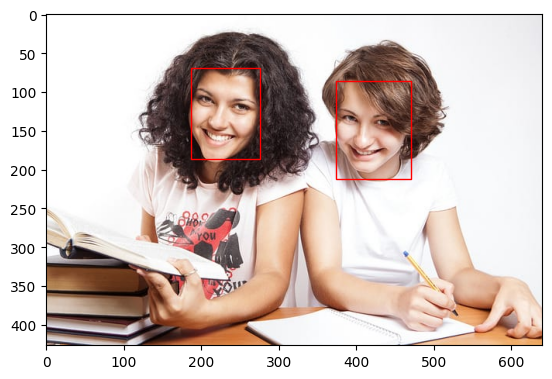

In [3]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()
 
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)


1/1 [==============================] - 0s 376ms/step


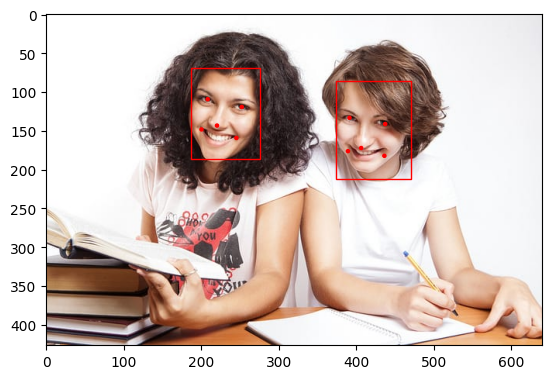

In [4]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
 
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

3/3 [==============================] - 0s 35ms/step


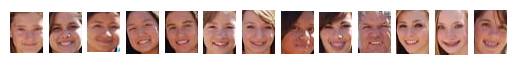

In [5]:
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()
 
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

## Assignment Question 1
Detect faces from live images taken from webcam.

In [6]:
import cv2
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# create MTCNN detector object
detector = MTCNN()

# initialize video capture object
cap = cv2.VideoCapture(0)

# continuously capture frames from webcam and detect faces
while True:
    # read a frame from the video feed
    ret, frame = cap.read()
    
    # detect faces in the current frame
    faces = detector.detect_faces(frame)

    # draw bounding boxes around detected faces
    for result in faces:
        # get coordinates
        x, y, width, height = result['box']
        # draw the box
        cv2.rectangle(frame, (x, y), (x+width, y+height), (0, 0, 255), 2)

    # display the resulting image with bounding boxes
    cv2.imshow('frame', frame)

    # break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release the video capture object and close the window
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 34ms/step


In [7]:
import cv2

# Load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start capturing video from the default camera
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the video stream
    ret, frame = cap.read()
    
    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
    
    # Draw a rectangle around each detected face
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Display the resulting frame
    cv2.imshow('frame', frame)
    
    # Wait for a key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()


## Assignment Question 2
Once you're done with images, then take short live video sequence and detect faces.

In [8]:
import cv2
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# create MTCNN detector object
detector = MTCNN()

# initialize video capture object
cap = cv2.VideoCapture('alley-39837.mp4')

# continuously capture frames from webcam and detect faces
while True:
    # read a frame from the video feed
    ret, frame = cap.read()
    
    # detect faces in the current frame
    faces = detector.detect_faces(frame)

    # draw bounding boxes around detected faces
    for result in faces:
        # get coordinates
        x, y, width, height = result['box']
        # draw the box
        cv2.rectangle(frame, (x, y), (x+width, y+height), (0, 0, 255), 2)

    # display the resulting image with bounding boxes
    cv2.imshow('frame', frame)

    # break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release the video capture object and close the window
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 59ms/step


In [9]:
import cv2

# Load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start capturing video from the default camera
cap = cv2.VideoCapture("alley-39837.mp4")

while True:
    # Read a frame from the video stream
    ret, frame = cap.read()
    
    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
    
    # Draw a rectangle around each detected face
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Display the resulting frame
    cv2.imshow('frame', frame)
    
    # Wait for a key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

## Assignment Question 3
Detect faces in mask wearing images.

1/1 [==============================] - 0s 393ms/step


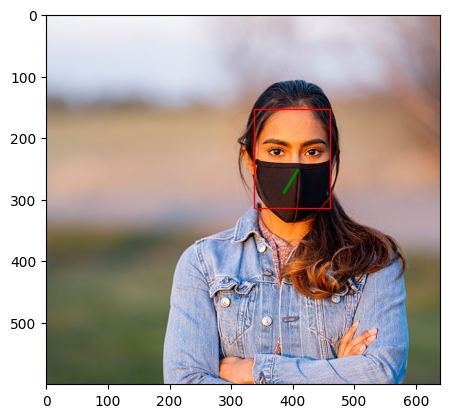

In [10]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # check if wearing mask
        if result['keypoints'] is not None:
            # get coordinates for nose and mouth
            nose_x, nose_y = result['keypoints']['nose']
            mouth_x, mouth_y = result['keypoints']['mouth_left'] # assuming left side
            # draw a line between nose and mouth to represent a mask
            ax.plot([nose_x, mouth_x], [nose_y, mouth_y], color='green', linewidth=2)
    # show the plot
    pyplot.show()
 
filename = 'test3.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)
